# Task 4: Classification of Iris Dataset using Decision Tree Algorithm

In [1]:
#Loading the Dataset
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
#Splitting data into train and yesy dataset
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [6]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2,criterion="gini", random_state = 0)
clf.fit(X_train, Y_train)
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [7]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.8947368421052632


In [8]:
#Tuning the Depth of the Tree
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

In [9]:
accuracy(#max accuracy when Depth  = 3)

[0.5789473684210527,
 0.8947368421052632,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

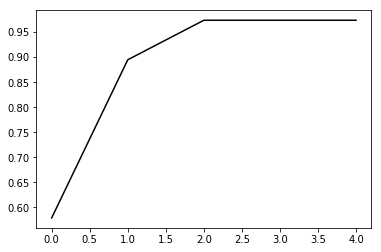

In [18]:
plt.plot(accuracy,"k")

In [21]:
#Retraining for improving accuracy
clf = DecisionTreeClassifier(max_depth = 3,criterion="gini", random_state = 0)
clf.fit(X_train, Y_train)
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
score = clf.score(X_test, Y_test)
print("Improved accuracy:")
print(score)

Improved accuracy:
0.9736842105263158


In [23]:
#Feature Importance
import numpy as np
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [24]:
importances

,feature,importance
3,petal width (cm),0.578
2,petal length (cm),0.422
0,sepal length (cm),0.000
1,sepal width (cm),0.000


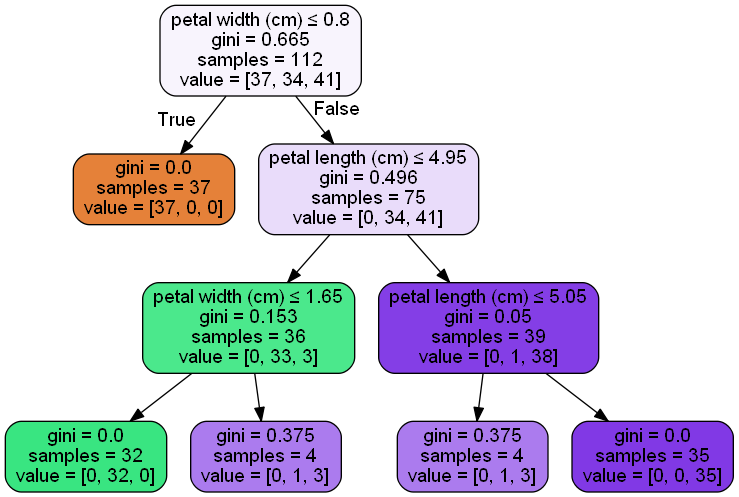

In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=data.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
#confusion matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

